In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
from numpy import linalg    
import matplotlib.pyplot as plt
from functools import partial
from scipy.misc import derivative
import itertools
import math

In [2]:
# For interactive plots
%matplotlib widget

# Task 1

## Lagrange polynomial

In [3]:
def find_lj (xs: np.array, x: float, j: int):
    assert len(xs) >= 2, "invalid number of points"
    assert j >= 0 and j < len(xs), "invalid index"
    res = 1.0
    for m in range(0, len(xs)):
        if (j != m):
            res *= (x - xs[m])/(xs[j] - xs[m])
    return res

def lagrange(xs: np.array, ys: np.array, x: float):
    assert len(xs) >= 2 and len(ys) >= 2, "invalid number of points"
    assert len(xs) == len(ys), "invalid number of points"
    res = 0.0
    for j in range(0, len(xs)):
        res += ys[j]* find_lj(xs, x, j)
    return res

In [4]:
def f(x):
    return 1/(1 + 25*x**2)
Xs = np.linspace(-1, 1, 500)
fs = f(Xs)

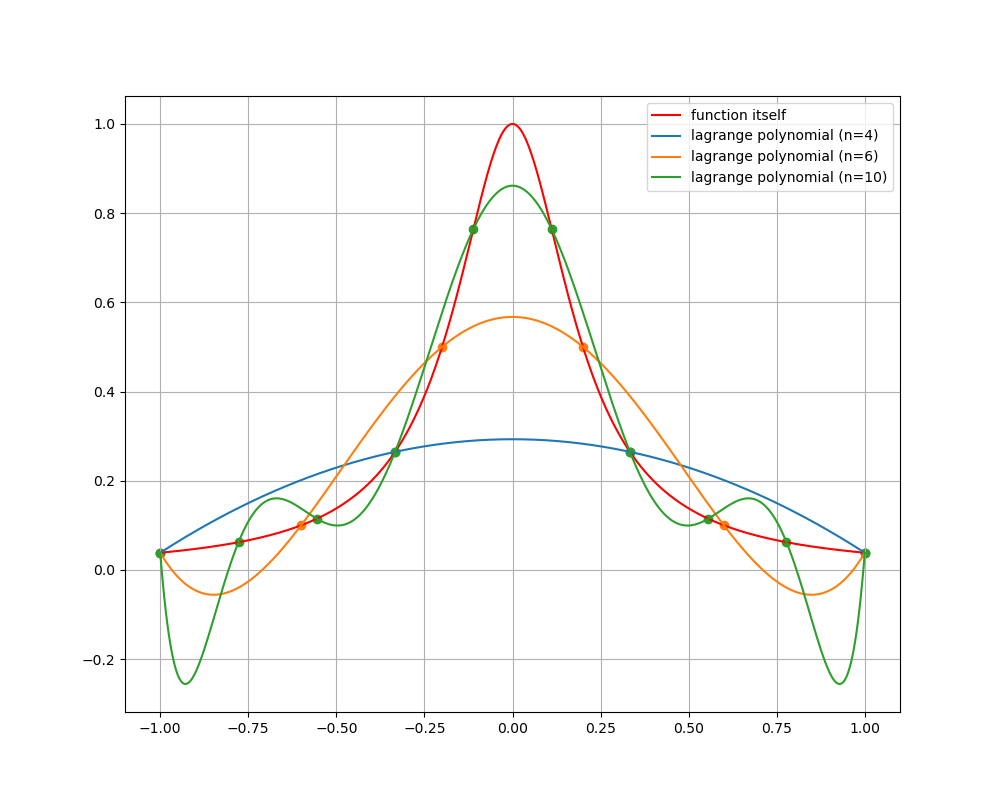

In [5]:
plt.figure(figsize=[10,8])
plt.plot(Xs, fs, label="function itself", color="red")

n = 4
xs = np.linspace(-1, 1, n)
ys = f(xs)
ps = np.array([lagrange(xs, ys, x) for x in Xs])
plt.scatter(xs, ys)
plt.plot(Xs, ps, label=f"lagrange polynomial (n={n})")

n = 6
xs = np.linspace(-1, 1, n)
ys = f(xs)
ps = np.array([lagrange(xs, ys, x) for x in Xs])
plt.scatter(xs, ys)
plt.plot(Xs, ps, label=f"lagrange polynomial (n={n})")

n = 10
xs = np.linspace(-1, 1, n)
ys = f(xs)
ps = np.array([lagrange(xs, ys, x) for x in Xs])
plt.scatter(xs, ys)
plt.plot(Xs, ps, label=f"lagrange polynomial (n={n})")
plt.legend()
plt.grid()

## Newton polynomial

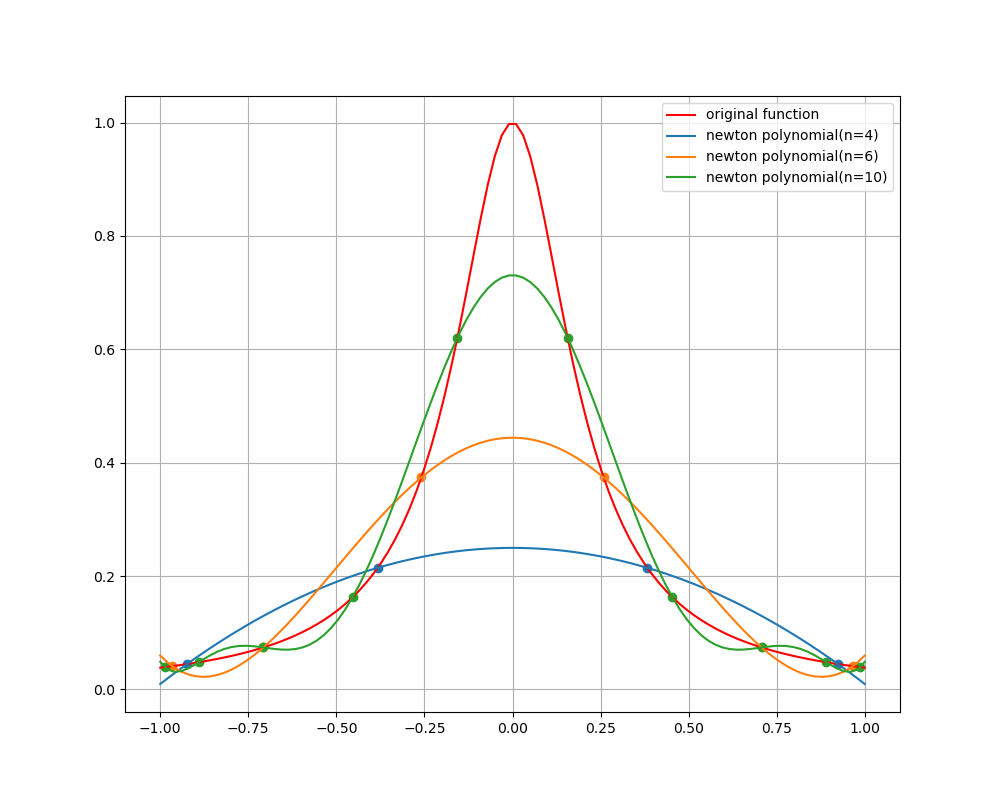

In [6]:
def find_dkn(xs: np.array, ys: np.array, k: int, n: int) -> float:
    #assert len(xs) == len(ys), "invalid number of points"
    if (k==n):
        return ys[0]
    d1 = find_dkn(xs, ys[:-1], k, n-1)
    d2 = find_dkn(xs, ys[1:], k+1, n)
    t1 = xs[k]
    t2 = xs[n]
    return (d2 - d1)/(t2 - t1)

def newton_polynomial(xs: np.array, ys: np.array) -> np.array:
    assert len(xs) == len(ys), "invalid number of points"
    return np.array([find_dkn(xs, ys, 0, k) for k in range(len(xs))])

def newton_polynomial_value(xs: np.array, coefs: np.array, x: float) -> float:
    res = 0
    n = len(xs)
    for i in range(n):
        m = 1.0
        for j in range(i):
            m *= x - xs[j]
        res += m * coefs[i]
    return res

def get_interpolation_points(a : float, b : float, n : int) -> np.array:
    points = []
    m = (a + b) / 2.0
    d = (b - a) / 2.0
    return np.array([m + d * np.cos((2*i - 1) * np.pi / (2*n)) for i in range(1, n+1)])

a, b = -1, 1
xs = np.linspace(a, b, 100)
fs = f(xs)

plt.figure(figsize=[10, 8])
plt.plot(xs, fs, color="red", label="original function")

n = 4
points = get_interpolation_points(a, b, n)
ys = f(points)
pol = newton_polynomial(points, ys)
ps = newton_polynomial_value(points, pol, xs)
plt.scatter(points, ys)
plt.plot(xs, ps, label=f"newton polynomial(n={n})")

n = 6
points = get_interpolation_points(a, b, n)
ys = f(points)
pol = newton_polynomial(points, ys)
ps = newton_polynomial_value(points, pol, xs)
plt.scatter(points, ys)
plt.plot(xs, ps, label=f"newton polynomial(n={n})")

n = 10
points = get_interpolation_points(a, b, n)
ys = f(points)
pol = newton_polynomial(points, ys)
ps = newton_polynomial_value(points, pol, xs)
plt.scatter(points, ys)
plt.plot(xs, ps, label=f"newton polynomial(n={n})")

plt.legend()
plt.grid()

# Task 2

In [7]:
def f(x: float) -> float:
    return (np.log(100 - x))/(10 - np.sqrt(x))

In [8]:
def get_legendre_poly(n: int) -> np.array:
    assert n > 0, "Invalid order of Legendre polynomial"
    poly_x_sq_minus_one = np.array([1.0, 0, -1.0])
    poly_to_power = np.polynomial.polynomial.polypow(poly_x_sq_minus_one, n)
    poly_der = np.polyder(poly_to_power, n)
    return poly_der / (math.factorial(n) * 2.0 ** n)

def get_legendre_poly_zeros_predictions(n: int) -> np.array:
    # http://naturalunits.blogspot.com/2013/10/zeros-of-legendre-polynomials.html
    def get_theta_n_k (k: int):
        return np.pi * (n - k + 0.75) / (n + 0.5)
    def get_xk(k: int):
        return (1.0 - 1 / (8.0 * n ** 2.0) + 1 / (8.0 * n ** 3.0) - 1 / (384.0 * n ** 4.0) * (39.0 - 28.0 / (np.sin(get_theta_n_k(k)) ** 2.0))) * np.cos(get_theta_n_k(k))
    return np.sort(np.array([get_xk(k) for k in range(1, n + 1)]))

In [9]:
def newton_solve(x, f, der, eps: float = 1e-7, max_iter: int = 100000) -> np.array:
    for i in range(max_iter):
        delta = f(x) / der(x)
        x -= delta
        if abs(delta) < eps:
            return x
    raise RuntimeWarning(
        "Newton's method does not converge or is slowly converging")

In [10]:
def get_legendre_zeros(n: int, eps: float = 1e-7, max_iter: int = 100000) -> np.array:
    poly = get_legendre_poly(n)
    polyder = np.polyder(poly)
    xs = get_legendre_poly_zeros_predictions(n)
    def func (x: float):
        return np.polyval(poly, x)
    def func_der(x: float):
        return np.polyval(polyder, x)
    return np.array([newton_solve(x, func, func_der, eps=eps, max_iter=max_iter) for x in xs])

In [11]:
def integrate_simpson(func, a: float, b: float, n: int) -> float:
    assert a <= b, "invalid bounds" 
    assert n > 0, "invalid order" 
    h = (b - a) / float(n)
    result = 0.0
    for i in range(0, n, 2):
        x_i = a + i * h
        x_j = x_i + h
        x_k = x_j + h
        f_i = func(x_i)
        f_j = func(x_j)
        f_k = func(x_k)
        result += (f_i + 4.0 * f_j + f_k)
    return (result / 3.0) * h

In [12]:
 def get_lagrange_base_poly(k: int, n: int, get_xi) -> np.array:
    assert n > 0, "invalid order"
    div = 1.0
    poly = np.array([1.0])
    for i in range(n):
        if (k == i):
            continue
        div *= (get_xi(k) - get_xi(i))
        poly = np.polymul(poly, np.array([1.0, -get_xi(i)]))
    return poly / div

In [62]:
def get_gauss_weights(n: int, eps: float = 1e-7) -> np.array:
    a, b = -1.0, 1.0
    points = get_legendre_zeros(n, eps = eps)
    get_xi = lambda i: points[i]
    def get_weight_k(k: int):
        poly = get_lagrange_base_poly(k, n, get_xi)
        f = lambda x: np.polyval(poly, x)
        num_points = 10000
        return integrate_simpson(f, a, b, num_points)
    return np.array([get_weight_k(k) for k in range(n)])

In [14]:
def integrate_gauss(f, a: float, b: float, n: int, eps = 1e-9):
    assert n > 0, "invalid order"
    assert a <= b, "invalid bounds" 
    weights = get_gauss_weights(n)
    points = get_legendre_zeros(n, eps = eps)
    f_changed = lambda x: f((b - a) / 2.0 * x + (b + a) / 2.0)
    res = (b - a) / 2.0 * sum((w * f_changed(point) for w, point in zip(weights, points)))
    return res

Gaussian quadrature result: 5.817685349884552
scipy's Gaussian quadrature: 5.816001553474594 +- 8.479294066887633e-08


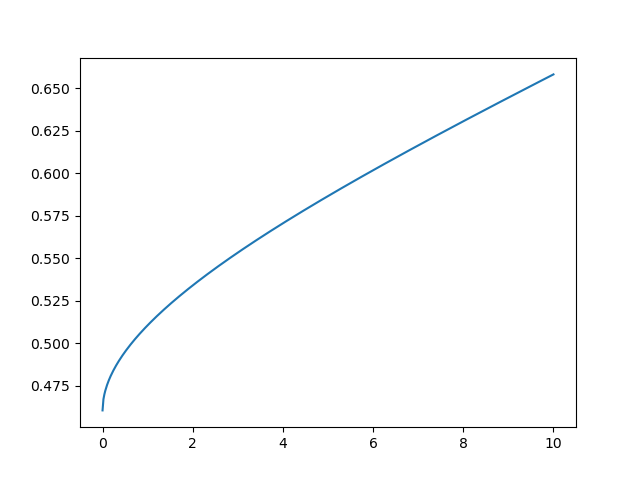

In [28]:
a = 0.0
b = 10.0
val = integrate_gauss(f, a, b, 4)
print(f"Gaussian quadrature result: {val}")
sp_res = sp.integrate.quadrature(f, a, b)
print(f"scipy's Gaussian quadrature: {sp_res[0]} +- {sp_res[1]}")

plt.figure()
xs = np.linspace(a, b, 500)
ys = f(xs)
plt.plot(xs, ys)

In [36]:
errs = []
ns = []
sp_res = sp.integrate.quad(f, a, b)[0]
for n in range(2, 20):
    val = integrate_gauss(f, a, b, n)
    errs.append(np.abs(sp_res - val))
    ns.append(n)

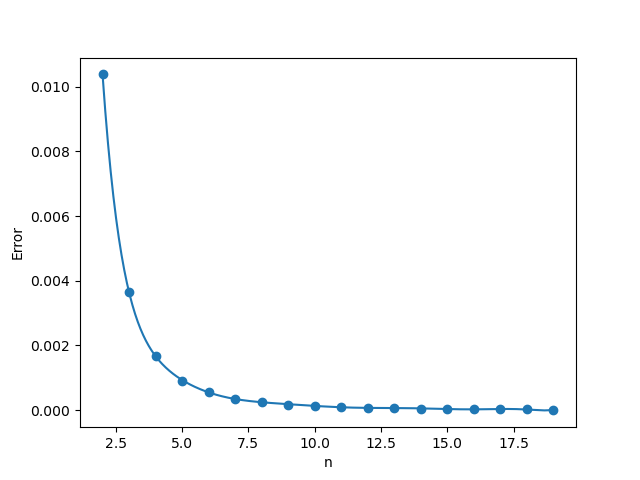

In [39]:
plt.figure()
plt.ylabel("Error")
plt.xlabel("n")
plt.scatter(ns, errs)
xs = np.linspace(min(ns), max(ns), 500)
coeffs = np.polyfit(ns, errs, 10)
pol = np.poly1d(coeffs)
plt.plot(xs, pol(xs))

# Task 3

In [43]:
def g(x : float) -> float:
    return 1

def f(x : float) -> float:
    return np.cos(x * np.pi)

def K(x: float, s: float) -> float:
    return 0.2 / (0.04 + (x-s)**2)

In [48]:
def decompose_lu(M):
    U = M.copy()
    n, m = U.shape[0], U.shape[1]
    L = np.diag(np.ones((n)))
    assert n == m, "Non-square matrices are not allowed"
    for It in range(n):
        for i in range(It+1, n):
            if (U[It,It] == 0):
                continue
            Coef = U[i,It]/U[It,It]
            L[i, It] = Coef
            for j in range(m):
                U[i,j] -= Coef * U[It,j]
    return L, U

def forward_substitution(M, b):
    Res = b.copy()
    for i in range(0, Res.size):
        for j in range (0, i):
            Res[i] -= Res[j] * M[i, j]
        Res[i] /= M[i,i]
    return Res

def backward_substitution(M, b):
    Res = b.copy()
    N = Res.size
    for i in range(N-1, 0-1, -1):
        for j in range (N-1, i, -1):
            Res[i] -= Res[j] * M[i, j]
        Res[i] /= M[i,i]
    return Res


def solve_system (M, b):
    L, U = decompose_lu(M)
    z = forward_substitution(L, b)
    return backward_substitution(U, z)

In [95]:
def divideSegment(Start : float, Stop : float, N : int) -> float:
    # Возвращает массив из N равноотстоящих точек отрезка [Start, Stop]
    Points = []
    Step = (Stop - Start) / (N - 1)
    for PointNum in range(N):
        Points.append(Start + PointNum * Step)
    return Points
    
def get_matrix(l: float, n: int, k: int, points: np.array, kfunc):
    weights = get_gauss_weights(n)
    matrix = np.zeros(shape = (n + k, n + k))
    for i in range(n + k):
        for j in range(n + k):
            if (j < n):
                matrix[i, j] = -l * weights[j] * kfunc(points[i], points[j])
    for i in range(n + k):
        matrix[i][i] += g(points[i])
    return matrix

def get_matrix_f(points: np.array, n: int, k: int):
    b = np.zeros(shape = (n + k, 1))
    for i in range(n + k):
        b[i, 0] = f(points[i])
    return b

def get_function_values(kfunc, g, f, l, a: float, b : float, n : int, xs : list) -> (list, list):
    points = divideSegment(a, b, n)
    h = (b - a) / (n - 1)
    k = int((max(xs) - b) / h) + 1
    additionals = [b + i * h for i in range(1, k + 1)]
    points += additionals

    matrix = get_matrix(l, n, k, points, kfunc)
    f = get_matrix_f(points, n, k)
    values = solve_system(matrix, f)
    return points, values

def get_function_value(x0 : float, args: list, values: list) -> float:
    arg_n = np.argmax(values < X0)
    return values[arg_n]


polynomial values with n = 3:
X0 =1.1, u(X0) = -0.27152236354310144
X0 =1.25, u(X0) = -0.27152236354310144
X0 =1.5, u(X0) = -0.27152236354310144

polynomial values with n = 4:
X0 =1.1, u(X0) = -0.378312426018837
X0 =1.25, u(X0) = -0.378312426018837
X0 =1.5, u(X0) = -0.378312426018837

polynomial values with n = 5:
X0 =1.1, u(X0) = -0.46785310397678287
X0 =1.25, u(X0) = -0.46785310397678287
X0 =1.5, u(X0) = -0.46785310397678287

polynomial values with n = 6:
X0 =1.1, u(X0) = -0.535928198779866
X0 =1.25, u(X0) = -0.535928198779866
X0 =1.5, u(X0) = -0.535928198779866


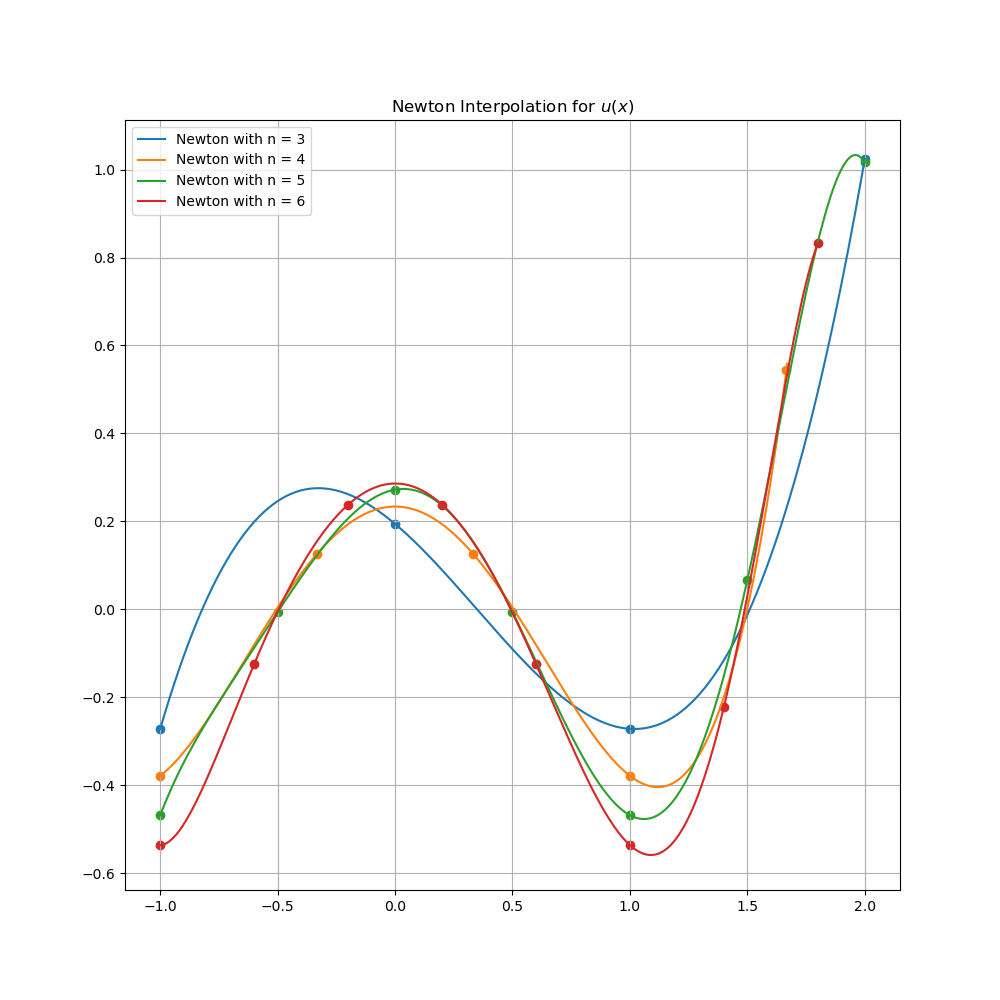

In [112]:
a = -1
b = 1
l = -1
# Число узлов
ns = [3, 4, 5, 6]
# Точки, в которых хотим получить значение u(x)
x0s = [1.1, 1.25, 1.5]

plt.figure(figsize = (10, 10))
plt.title("Newton Interpolation for $u(x)$")

for n in ns:
    points, values = get_function_values(K, g, f, l, a, b, n, x0s)
    plt.scatter(points, values)
    xs = np.arange(-1, max(points) + 0.01, 0.01)
    pol = newton_polynomial(points, values)
    ps = np.array([newton_polynomial_value(points, pol, x) for x in xs])
    
    print(f"\npolynomial values with n = {n}:")
    for X0 in ArrayX0:
        print(f"X0 ={X0}, u(X0) = {get_function_value(X0, xs, ps)[0]}")
    plt.plot(xs, ps, label = f"Newton with n = {n}")

plt.grid()
plt.legend()
plt.show()
